In [1]:
from data import btc_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
btc_data.head()

,Open,High,Low,Close
Date,,,,
2013-04-30,135.30,141.96,135.30,135.30
2013-05-03,117.00,117.00,91.01,91.01
2013-05-07,111.25,118.33,106.40,106.40
2013-05-11,112.64,118.78,112.64,113.01
2013-05-15,114.71,117.18,114.16,114.16


In [3]:
btc_data.tail()

,Open,High,Low,Close,date
Date,,,,,
2024-02-27,50841.0,54478.0,50841.0,54478.0,2024-02-27
2024-02-29,57004.0,62559.0,57004.0,62559.0,2024-02-29
2024-03-03,61298.0,62427.0,61298.0,62068.0,2024-03-03
2024-03-07,63053.0,68187.0,63053.0,66146.0,2024-03-07
2024-03-11,66945.0,68508.0,66945.0,68508.0,2024-03-11


In [4]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2013-04-30 to 2024-03-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    1036 non-null   float64       
 1   High    1036 non-null   float64       
 2   Low     1036 non-null   float64       
 3   Close   1036 non-null   float64       
 4   date    1036 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.6 KB


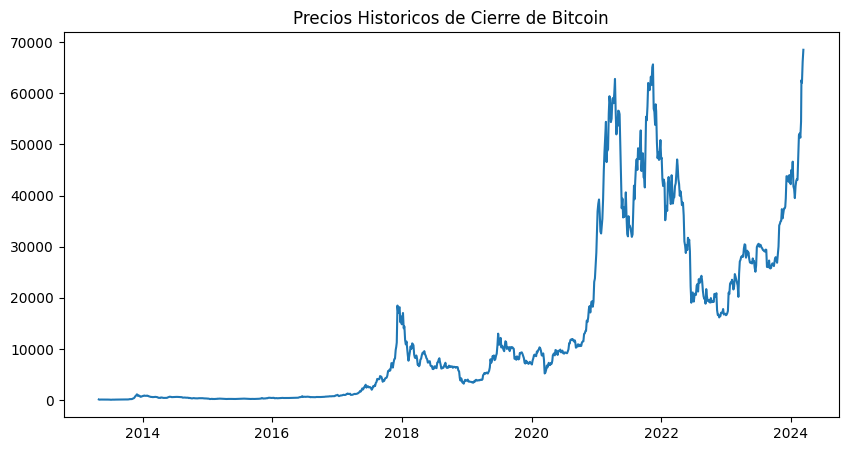

In [6]:
plt.figure(figsize=(10,5))
plt.plot(btc_data["Close"])
plt.title("Precios Historicos de Cierre de Bitcoin")
plt.show()

Comparación de datos reales vs predicciones.

In [83]:
from modelo import set_validacion, prediccion

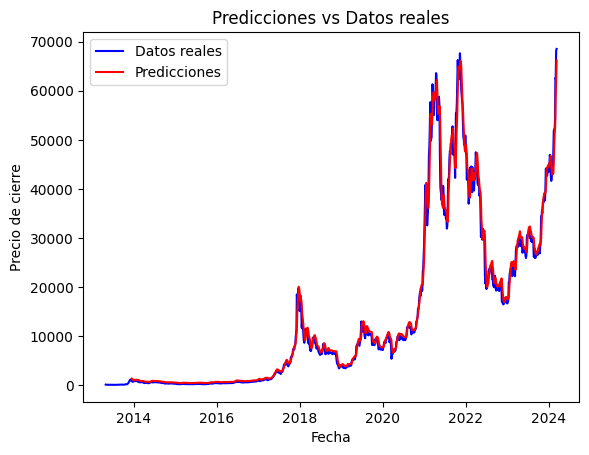

In [84]:
## Datos reales
plt.plot(set_validacion.index, set_validacion.values, color='blue', label='Datos reales')

## Predicciones
plt.plot(set_validacion.index[60:], prediccion, color='red', label='Predicciones')

plt.title('Predicciones vs Datos reales')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()